<a href="https://colab.research.google.com/github/bratburdj/NASA_HAQAST/blob/main/Registration_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import os
import pandas as pd
from datetime import datetime, timedelta
#!pip install matplotlib-venn

#data = pd.read_csv(r'/content/Registration-jan2022-april2023.csv')
data = pd.read_csv(r'/content/Registration-jan2022-oct2023v2.csv')
df = pd.DataFrame(data,columns=['Meeting','Recorded Date','Duration (in seconds)',
                                'Name','Email','Affiliation','AttendanceType',
                                'AttendanceTypeOther','SpeakingInterest',
                                'Characteristics','Stakeholder','Count','Start','End',
                                'OrgType'])

#set datetime here

df['Recorded Date'] = pd.to_datetime(df['Recorded Date'],format="%m/%d/%y  %H:%M")
df['Start'] = pd.to_datetime(df['Start'],format="%m/%d/%y  %H:%M")
df['End'] = pd.to_datetime(df['End'],format="%m/%d/%y  %H:%M")

df['TimeDiff_fromStart'] = df.apply(lambda row: row['Recorded Date'] - row['Start'], axis=1)
df['TimeDiff_fromEnd'] = df.apply(lambda row: row['End'] - row['Recorded Date'], axis=1)
df['TimeDiff_fromEnd'] = -df['TimeDiff_fromEnd']


#df.set_index('Recorded Date',inplace=True)
#df.index = pd.to_datetime(df.index, unit='s')
#print(df['Recorded Date'])
#print(df['TimeDiff'])

df.set_index('TimeDiff_fromEnd',inplace=True)



Length pre-clean374
355
232
123


Text(0.5, 1.0, 'Meeting Registration')

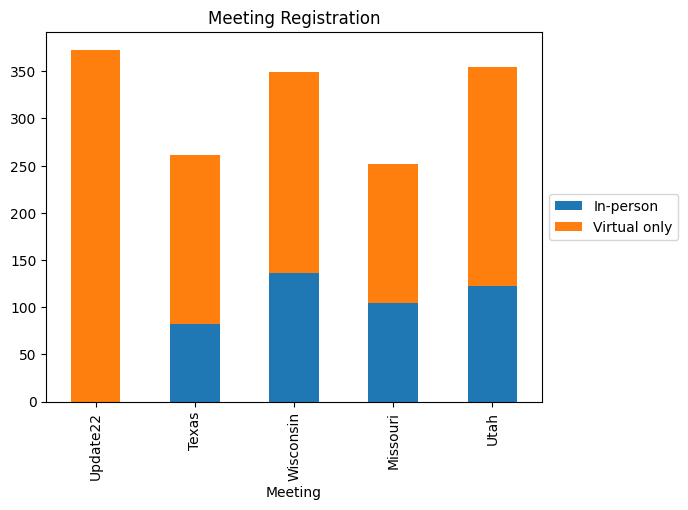

In [ ]:
#Need to remove duplicate emails for each meeting, store first version elsewhere
#subset by meeting

#change all emails to lowercase to help matches remove duplicates
df['Email'] = df['Email'].str.lower()
#df_inperson = df[df['AttendanceType'] == 'In-person']
#df_online = df[df['AttendanceType'] == 'Virtual only']

ut_df = df[df['Meeting'] == 'Utah']
mo_df = df[df['Meeting'] == 'Missouri']
wi_df = df[df['Meeting'] == 'Wisconsin']
tx_df = df[df['Meeting'] == 'Texas']
up_df = df[df['Meeting'] == 'Update22']


print("Length pre-clean" + str(len(ut_df)))
#print(len(wi_df))

#store duplicates in separate dataframe
#make new clean dataframe without duplicates for each meeting

ut_duplicates = ut_df[ut_df.duplicated(subset='Email')]
ut_df = ut_df.drop_duplicates(subset=['Email'], keep='last')

mo_duplicates = mo_df[mo_df.duplicated(subset='Email')]
mo_df = mo_df.drop_duplicates(subset=['Email'], keep='last')

wi_duplicates = wi_df[wi_df.duplicated(subset='Email')]
wi_df = wi_df.drop_duplicates(subset=['Email'], keep='last')

tx_duplicates = tx_df[tx_df.duplicated(subset='Email')]
tx_df = tx_df.drop_duplicates(subset=['Email'], keep='last')

up_duplicates = up_df[up_df.duplicated(subset='Email')]
up_df = up_df.drop_duplicates(subset=['Email'], keep='last')

#print(len(mo_df))
print(len(ut_df))
clean_df = pd.concat([ut_df,mo_df,wi_df,tx_df,up_df])#,wi_df,tx_df,up_df)
clean_df.to_csv(r'clean_df.csv')
#print(len(clean_df)

ut_df_ip = ut_df[ut_df['AttendanceType'] == 'In-person']
mo_df_ip = mo_df[mo_df['AttendanceType'] == 'In-person']
wi_df_ip = wi_df[wi_df['AttendanceType'] == 'In-person']
tx_df_ip = tx_df[tx_df['AttendanceType'] == 'In-person']
up_df_ip = up_df[up_df['AttendanceType'] == 'In-person']

clean_df_ip = pd.concat([ut_df_ip,mo_df_ip,wi_df_ip,tx_df_ip,up_df_ip])

ut_df_on = ut_df[ut_df['AttendanceType'] == 'Virtual only']
mo_df_on = mo_df[mo_df['AttendanceType'] == 'Virtual only']
wi_df_on = wi_df[wi_df['AttendanceType'] == 'Virtual only']
tx_df_on = tx_df[tx_df['AttendanceType'] == 'Virtual only']
up_df_on = up_df[up_df['AttendanceType'] == 'Virtual only']

#print(len(mo_df)) #should be 252, is 254? check caps
#print(len(wi_df)) #should be 350 is 351?
print(len(ut_df_on))
print(len(ut_df_ip))

import matplotlib.pyplot as plt
import seaborn as sns
#sort these?
meeting_names = ['Update22','Texas','Wisconsin','Missouri','Utah']
#mapping = {meet: i for i, meet in enumerate(meeting_names)}
#key = clean_df['Meeting'].map(mapping)
#clean_df = clean_df.iloc[key.argsort()]

meetingtype = clean_df.groupby(['Meeting','AttendanceType'])['Count'].sum().unstack()
#key = meetingtype['Meeting'].map(mapping)
#meetingtype.iloc[key.argsort()]
meetingtype.reindex(meeting_names).plot(kind='bar',stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Meeting Registration')


#stakeholder_counts = [up_percentStake,tx_percentStake,wi_percentStake,mo_percentStake]
#stakeholder_counts = [up_percentStake,tx_percentStake,wi_percentStake,mo_percentStake,ut_percentStake]
#ax.bar(meeting_names,stakeholder_counts)

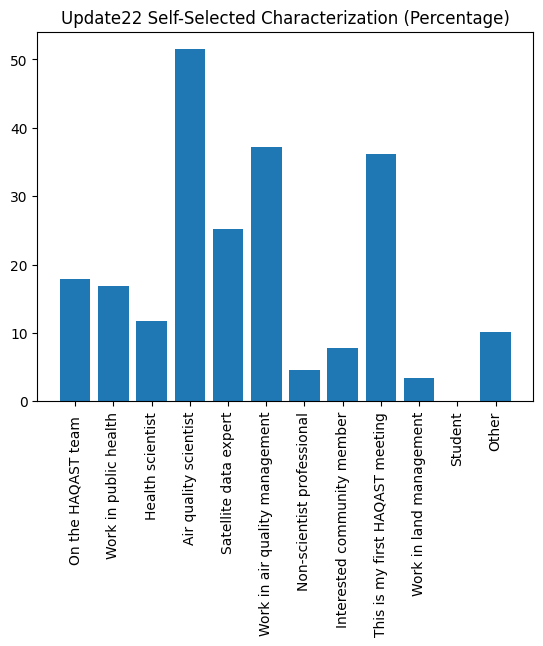

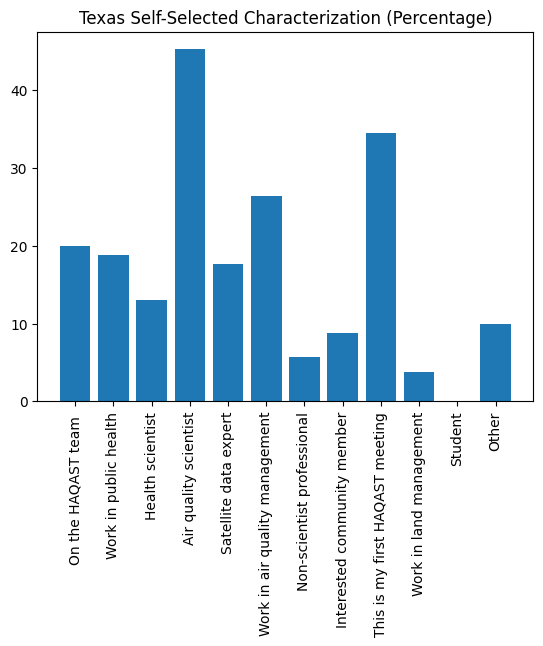

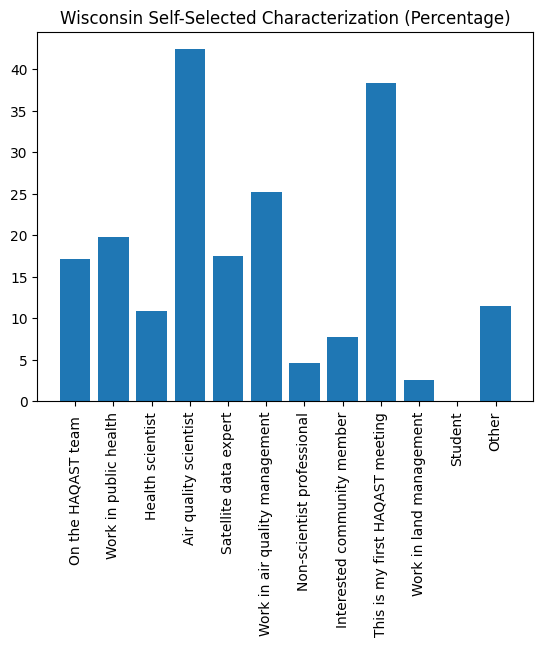

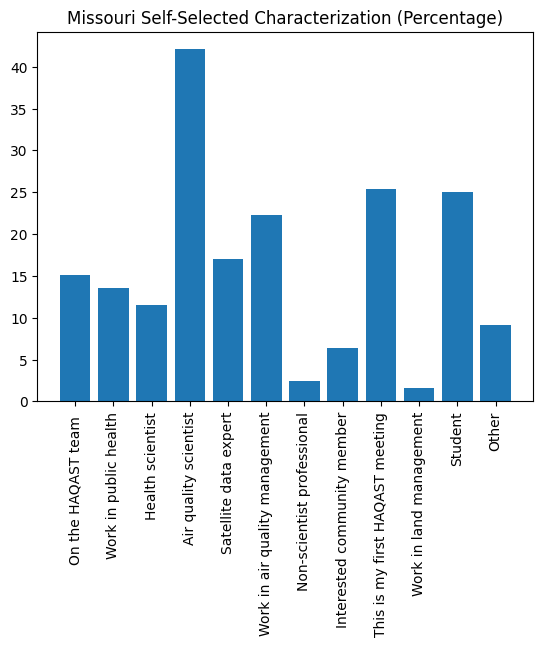

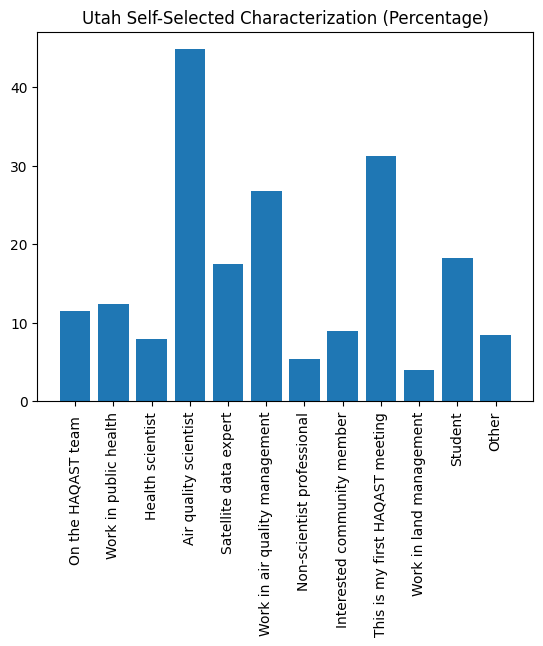

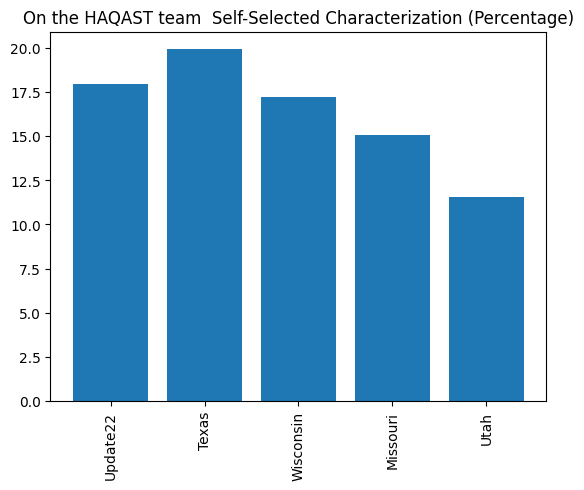

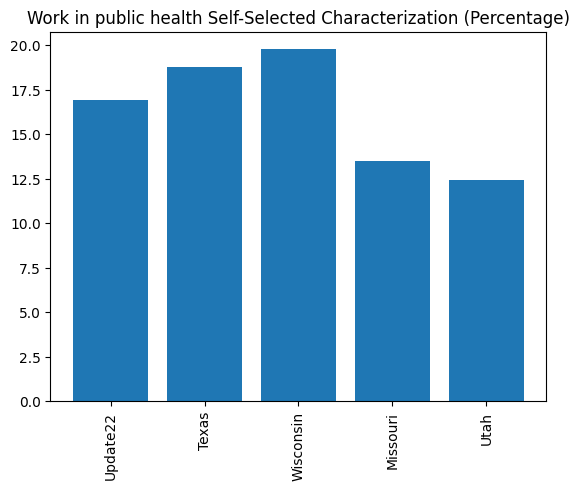

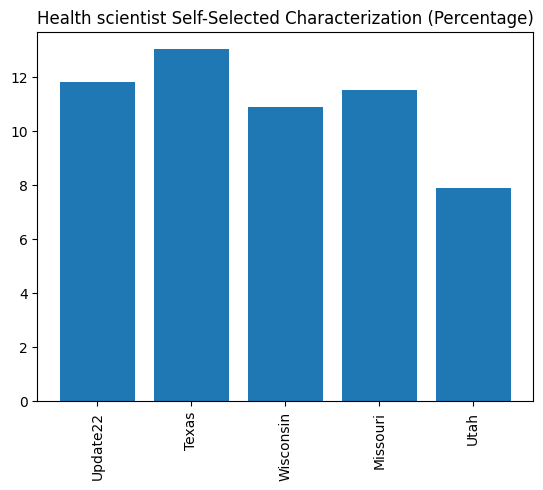

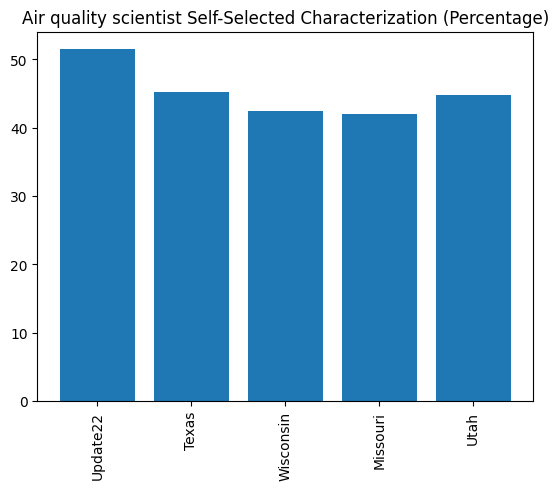

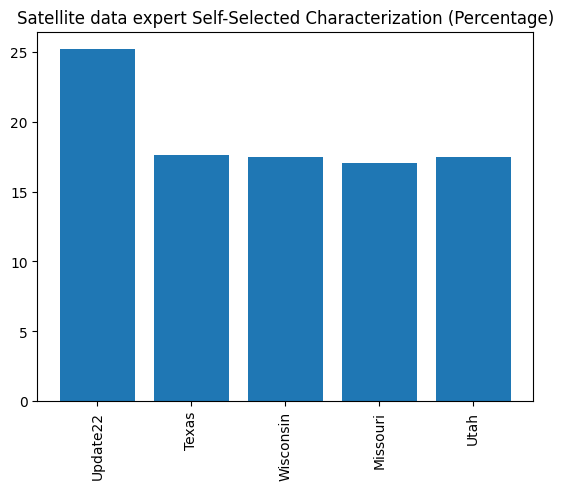

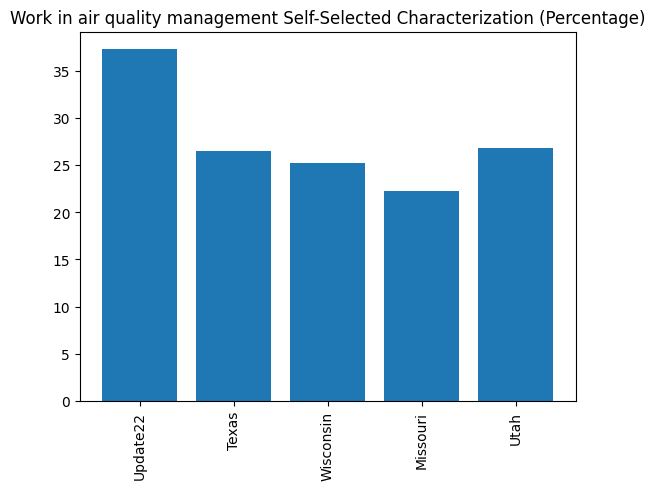

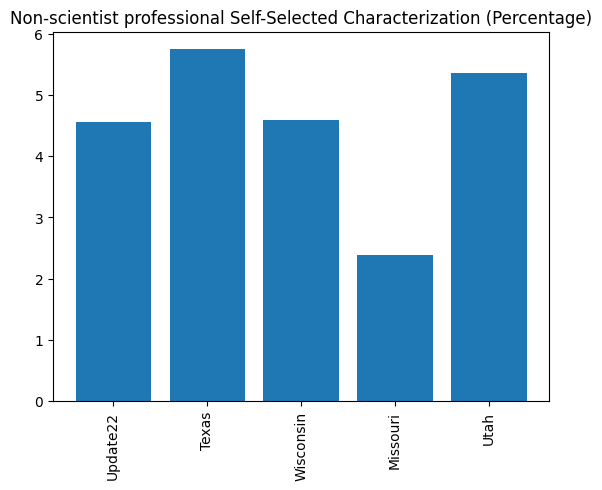

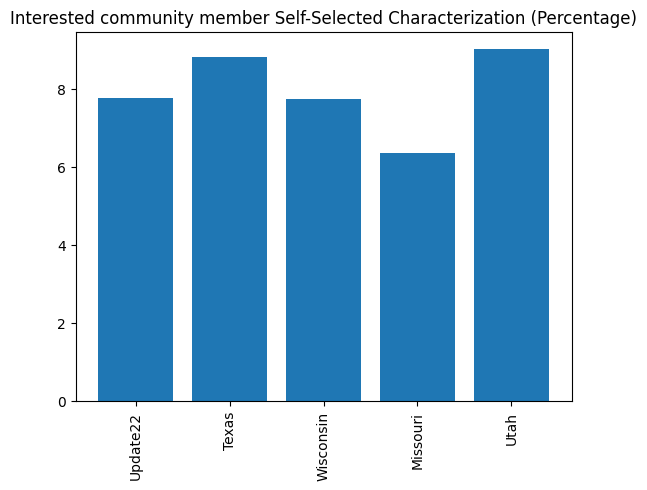

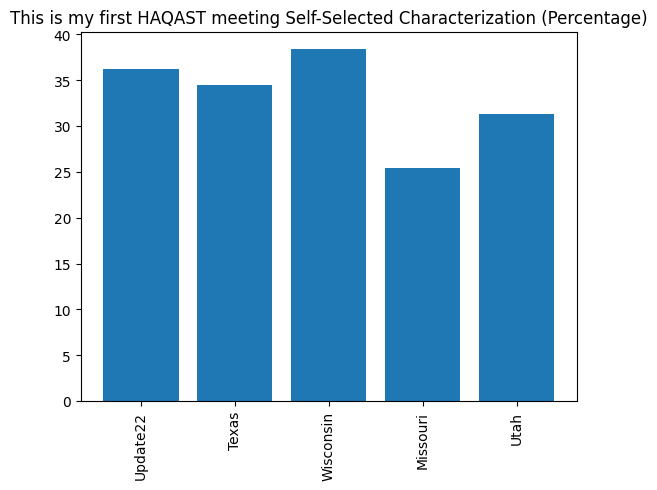

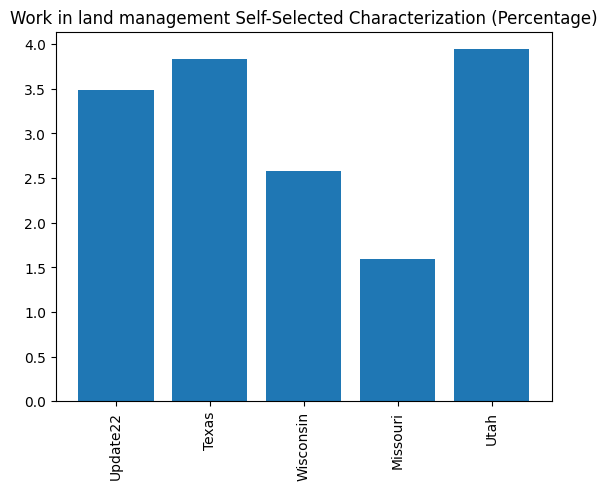

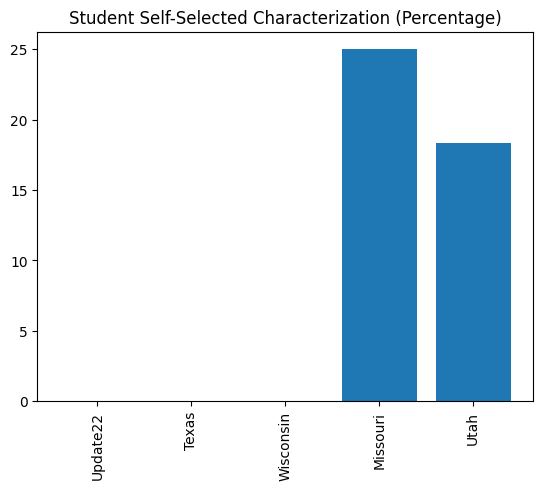

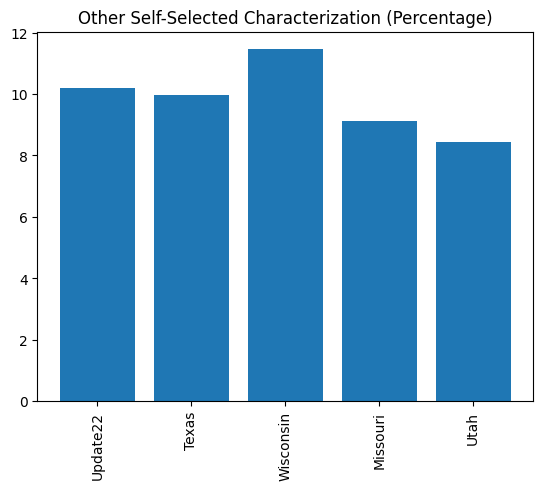

First Time at Utah: 31.26760563380282


In [ ]:
#Characteristics
import csv

meeting_names = ['Update22','Texas','Wisconsin','Missouri','Utah']
meeting_att_length = {'Update22': len(up_df),'Texas': len(tx_df),'Wisconsin': len(wi_df),
                      'Missouri': len(mo_df),'Utah': len(ut_df)}

character_types = ['On the HAQAST team ',
                   'Work in public health','Health scientist',
                   'Air quality scientist','Satellite data expert','Work in air quality management',
                   'Non-scientist professional','Interested community member',
                   'This is my first HAQAST meeting','Work in land management',
                   'Student','Other']


c_types = {}
c_types_percent = {}
for m in meeting_names:
  c_types[m] = {}
  c_types_percent[m] = {}
  for c in character_types:
    c_types[m][c] = 0
    c_types_percent[m][c] = 0.0

for index, row in clean_df.iterrows():
  char_column = row['Characteristics']
  meeting_column = row['Meeting']
  #print(char_column)
  #print(meeting_column)
  if isinstance(char_column,str):
    items = char_column.split(',')
    for i in items:
      c_types[meeting_column][i] += 1

import matplotlib.pyplot as plt
#for i in c_types:
#  names = list(c_types[i].keys())
#  values = list(c_types[i].values())
#  plt.bar(range(len(c_types[i])), values, tick_label=names)
#  plt.title(i + " Self-Selected Characterization")
#  plt.xticks(rotation='vertical')
#  plt.show()




for i in c_types:
  for j in c_types[i]:
    c_types_percent[i][j] = float (float(c_types[i][j]) / float(meeting_att_length[i])*100)

inv_c_types_percent = {}
for c in character_types:
  inv_c_types_percent[c] = {}
  for m in meeting_names:
    inv_c_types_percent[c][m] = c_types_percent[m][c]

for i in c_types_percent:
  names = list(c_types_percent[i].keys())
  values = list(c_types_percent[i].values())
  plt.bar(range(len(c_types_percent[i])), values, tick_label=names)
  plt.title(i + " Self-Selected Characterization (Percentage)")
  plt.xticks(rotation='vertical')
  plt.show()

for i in inv_c_types_percent:
  names = list(inv_c_types_percent[i].keys())
  values = list(inv_c_types_percent[i].values())
  plt.bar(range(len(inv_c_types_percent[i])), values, tick_label=names)
  plt.title(i + " Self-Selected Characterization (Percentage)")
  plt.xticks(rotation='vertical')
  plt.show()

print("First Time at Utah: " + str(c_types_percent['Utah']['This is my first HAQAST meeting']))

#maybe combine public health and health scientist; AQ management/AQ scientist




#with open (clean_df.csv,'r') as csvfile:
#  csvreader = csv.DictReader(csvfile)
#  for row in csvreader:
            # Get the value in the specified column
#            column_value = row['Characteristics']

            # Split the comma-separated values
#            items = column_value.split(',')

            # Update the Counter with the items in the list
#            item_counter.update(items)



<Axes: xlabel='Meeting'>

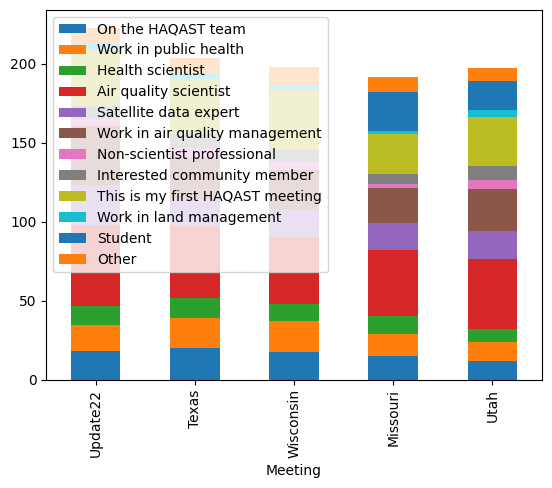

In [ ]:
#test_df = pd.DataFrame.from_dict({(i,j): inv_c_types_percent[i][j]
#                           for i in inv_c_types_percent.keys()
#                           for j in inv_c_types_percent[i].keys()},
#                       orient='index')
#print(inv_c_types_percent)
import pandas as pd
test_df = pd.DataFrame(inv_c_types_percent,columns=inv_c_types_percent.keys())
test_df = test_df.rename_axis('Meeting')
test_df.plot(kind='bar',stacked=True)

#pd.concat({
#        k: pd.DataFrame.from_dict(v, 'index') for k, v in inv_c_types_percent.items()
#    },
#    axis=0)
#print(test_df)
#test_df.columns = ['Characteristic','Meeting']

#test_df.head()
#meetingtype = test_df.groupby(['Meeting'])
#key = meetingtype['Meeting'].map(mapping)
#meetingtype.iloc[key.argsort()]
#meetingtype.reindex(meeting_names).plot(kind='bar',stacked=True)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#plt.title('Meeting Registration')

#testout = test_df.groupby(['Meeting','Characteristics'])['Count'].sum().unstack()

#meetingtype.reindex(meeting_names).plot(kind='bar',stacked=True)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
##plt.title('Meeting Registration')

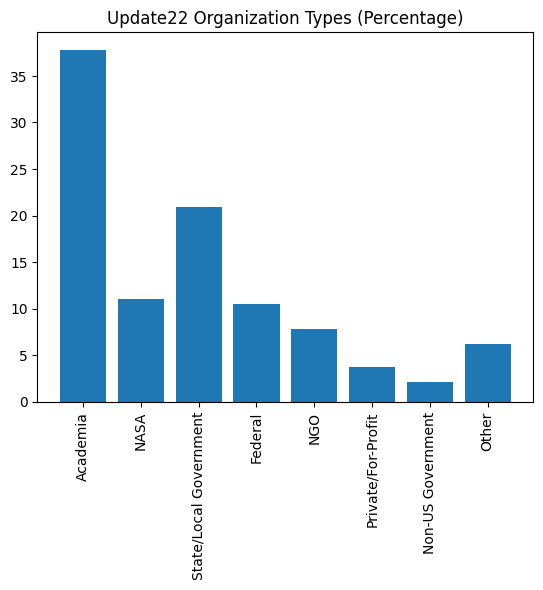

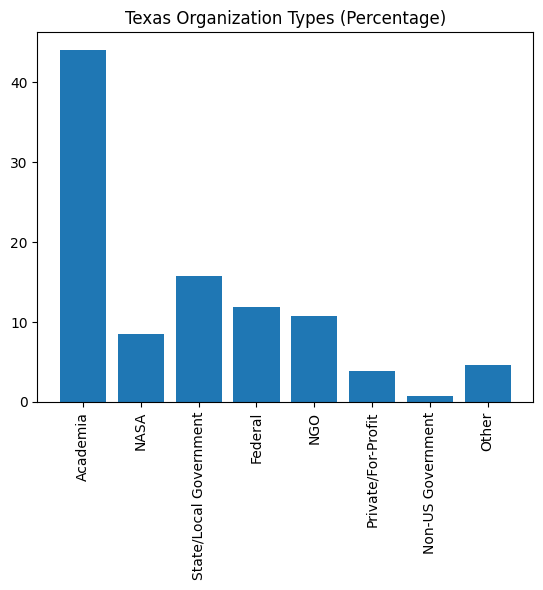

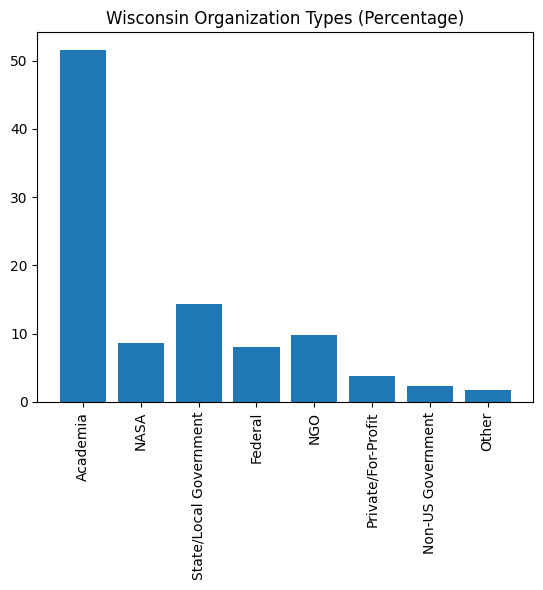

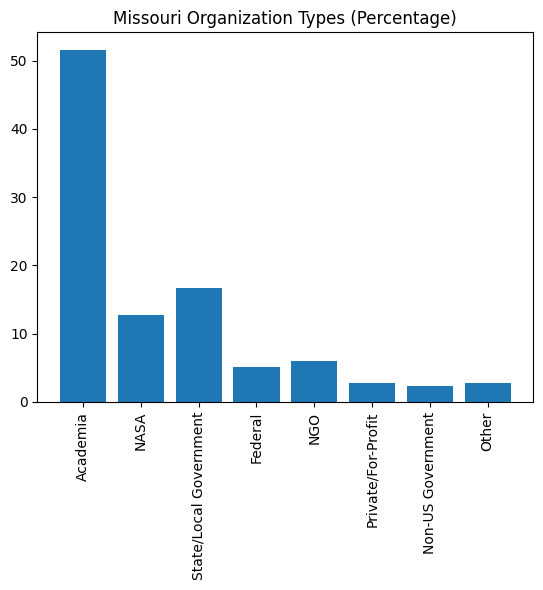

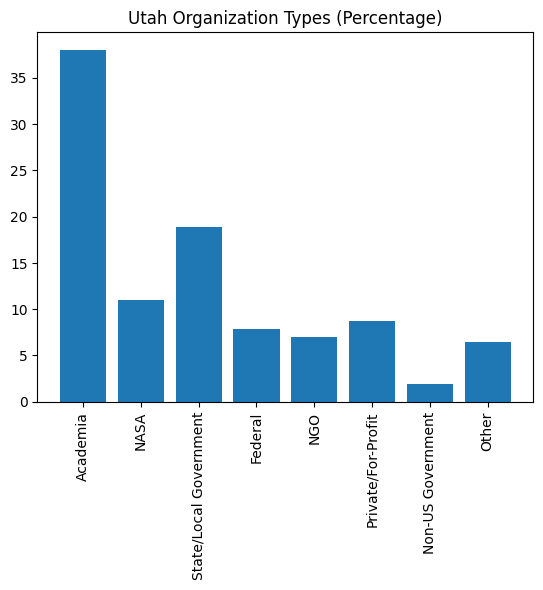

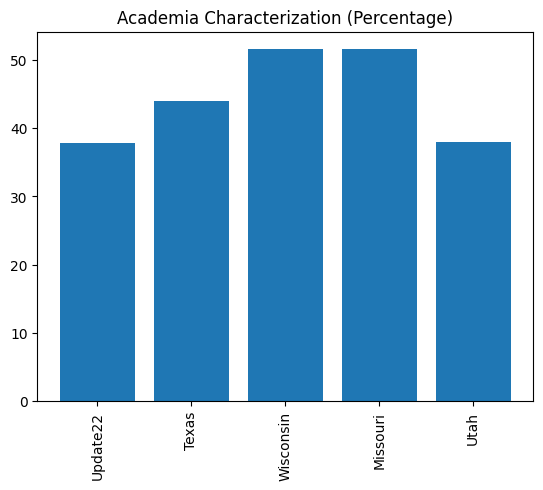

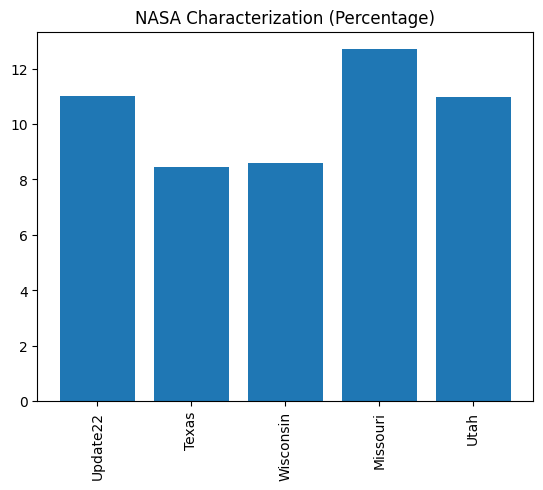

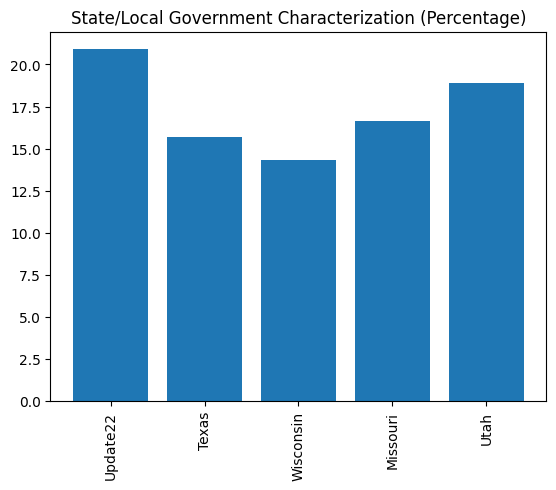

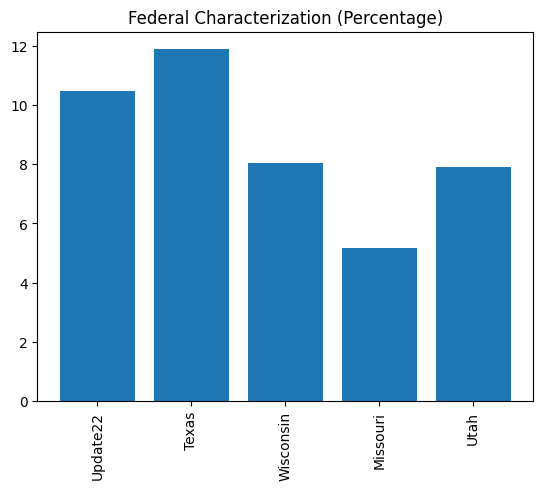

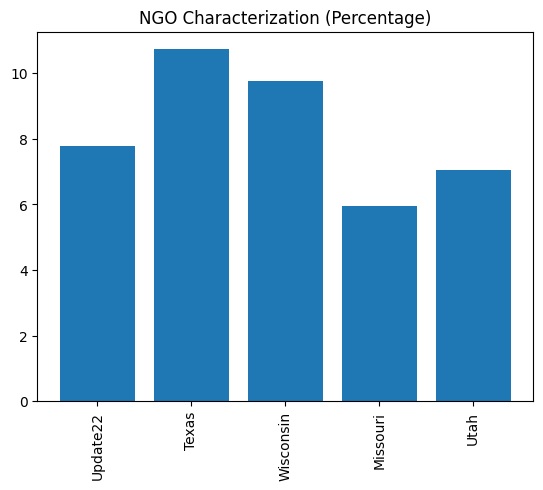

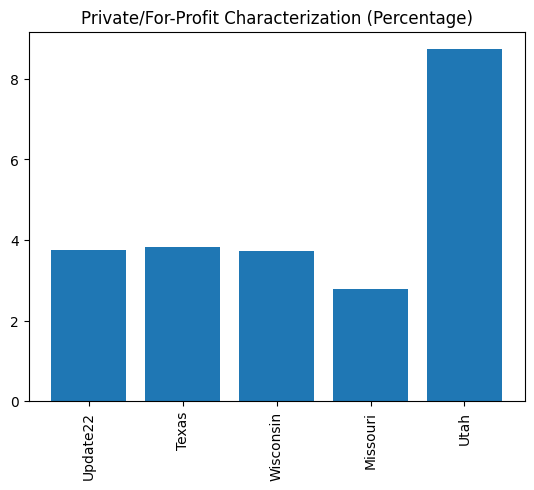

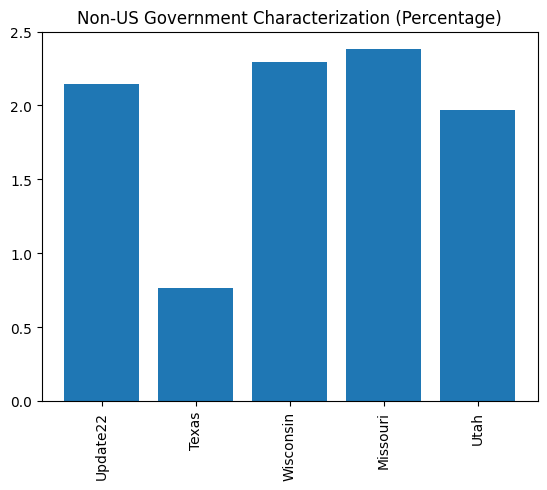

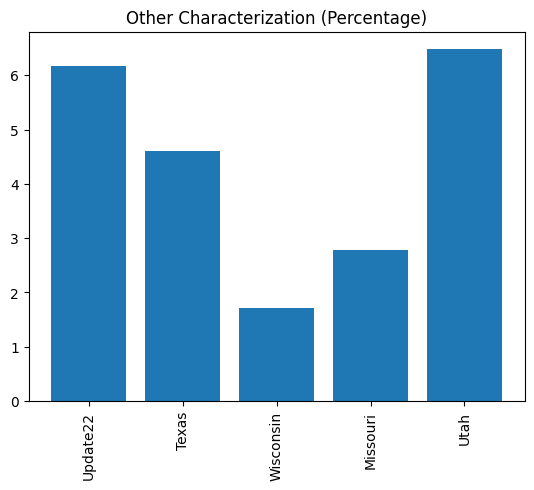

In [ ]:
###Add Org Type
org_types = ['Academia','NASA','State/Local Government','Federal',
                   'NGO','Private/For-Profit',
                   'Non-US Government','Other']
o_types = {}
o_types_percent = {}
for m in meeting_names:
  o_types[m] = {}
  o_types_percent[m] = {}
  for c in org_types:
    o_types[m][c] = 0
    o_types_percent[m][c] = 0.0

for index, row in clean_df.iterrows():
  char_column = row['OrgType']
  meeting_column = row['Meeting']
  #print(char_column)
  #print(meeting_column)
  if isinstance(char_column,str):
    items = char_column.split(',')
    for i in items:
      o_types[meeting_column][i] += 1


#
for i in o_types:
  for j in o_types[i]:
    o_types_percent[i][j] = float (float(o_types[i][j]) / float(meeting_att_length[i])*100)

inv_o_types_percent = {}
for c in org_types:
  inv_o_types_percent[c] = {}
  for m in meeting_names:
    inv_o_types_percent[c][m] = o_types_percent[m][c]

for i in o_types_percent:
  names = list(o_types_percent[i].keys())
  values = list(o_types_percent[i].values())
  plt.bar(range(len(o_types_percent[i])), values, tick_label=names)
  plt.title(i + " Organization Types (Percentage)")
  plt.xticks(rotation='vertical')
  plt.show()


for i in inv_o_types_percent:
  names = list(inv_o_types_percent[i].keys())
  values = list(inv_o_types_percent[i].values())
  plt.bar(range(len(inv_o_types_percent[i])), values, tick_label=names)
  plt.title(i + " Characterization (Percentage)")
  plt.xticks(rotation='vertical')
  plt.show()

#count = 0
#prev = ''
#for i in inv_o_types_percent:
#  names = list(inv_o_types_percent[i].keys())
#  values = list(inv_o_types_percent[i].values())
#  if count == 0:
#    plt.bar(range(len(inv_o_types_percent[i])), values, tick_label=names)
#    count = 1
#    prev = i
#  else:
#    plt.bar(range(len(inv_o_types_percent[i])), values, bottom=values[0], tick_label=names)
#plt.title(i + " Characterization (Percentage)")
#plt.xticks(rotation='vertical')
#plt.legend()
#plt.show()

#plt.bar()



Text(0.5, 1.0, 'Organization Types Registered Per Meeting (Percent)')

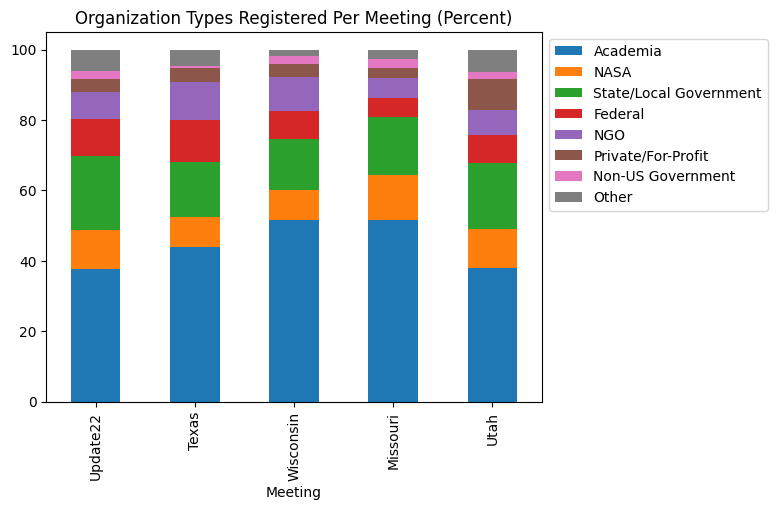

In [ ]:
#import pandas as pd
stacked_o_df = pd.DataFrame(inv_o_types_percent,columns=inv_o_types_percent.keys())
stacked_o_df = stacked_o_df.rename_axis('Meeting')
#
stacked_o_df.plot(kind='bar',stacked=True).legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Organization Types Registered Per Meeting (Percent)')
#ax.legend(bbox_to_anchor=(1.0, 1.0))

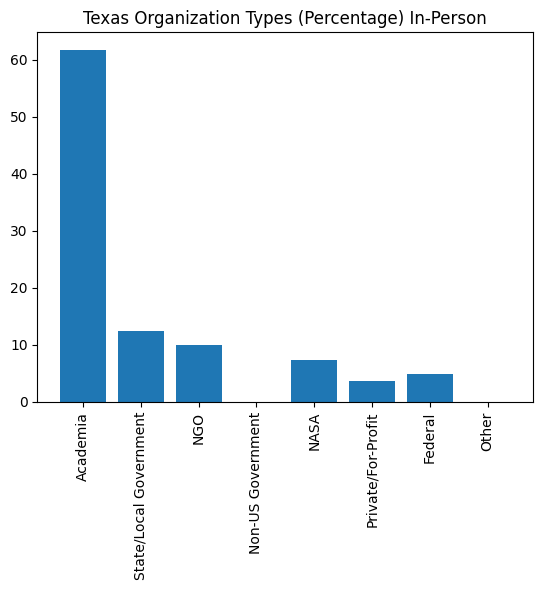

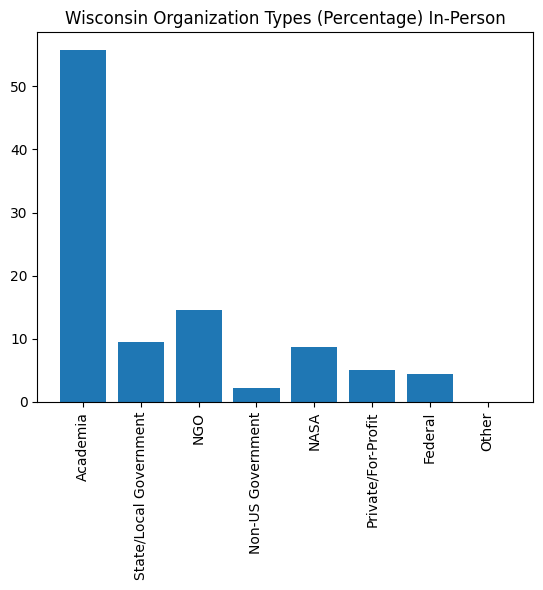

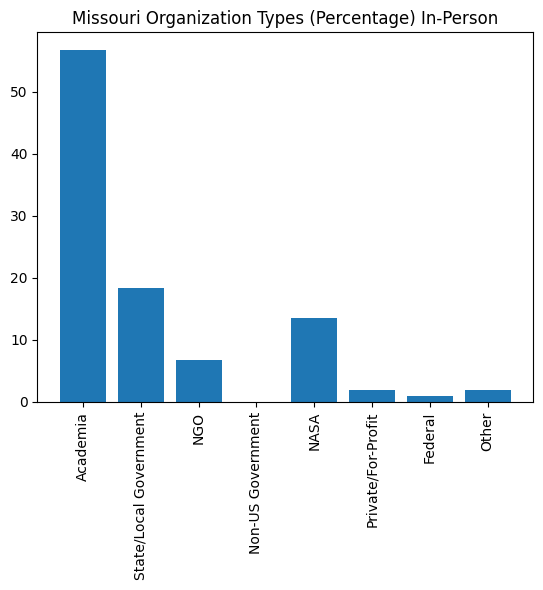

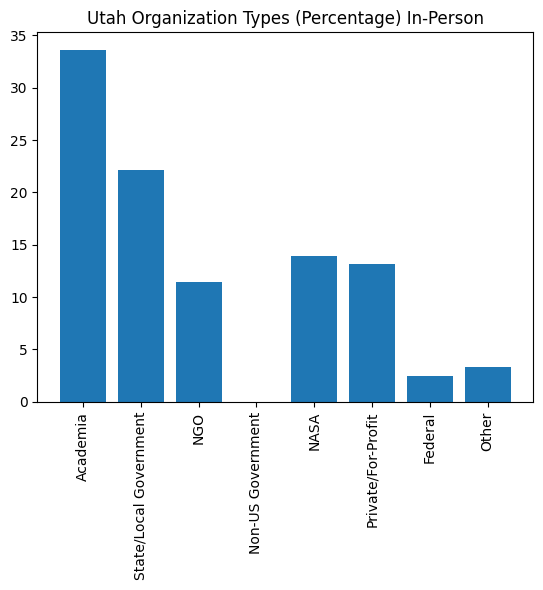

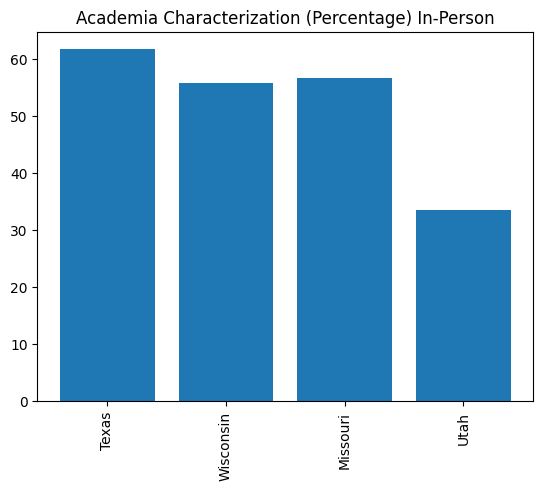

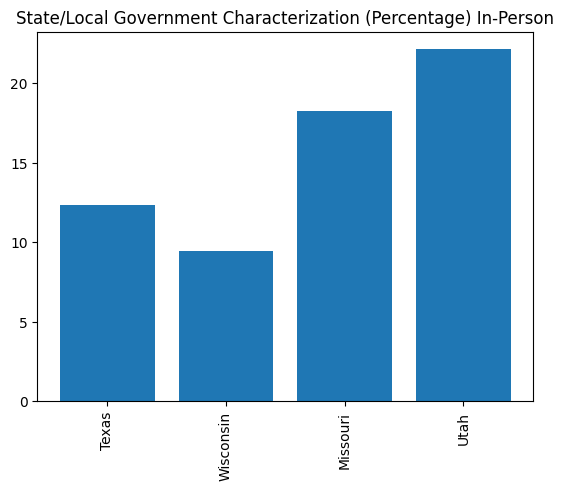

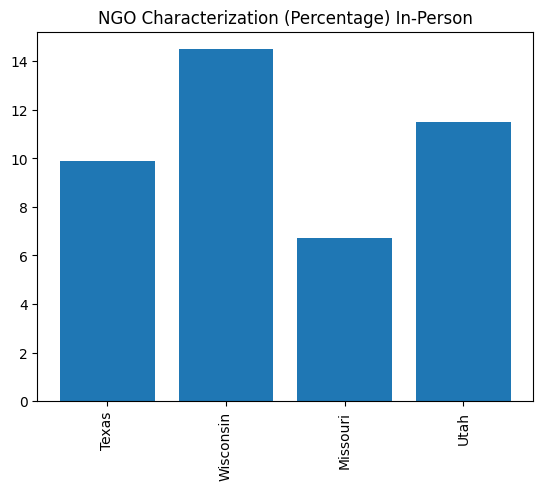

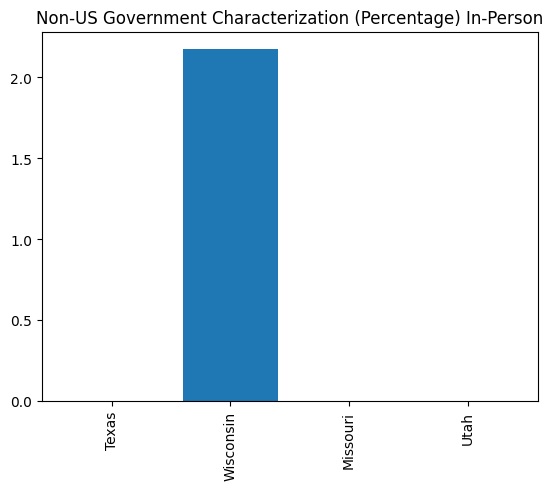

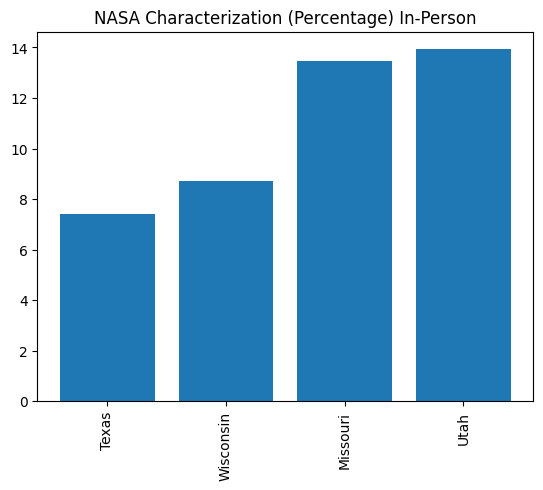

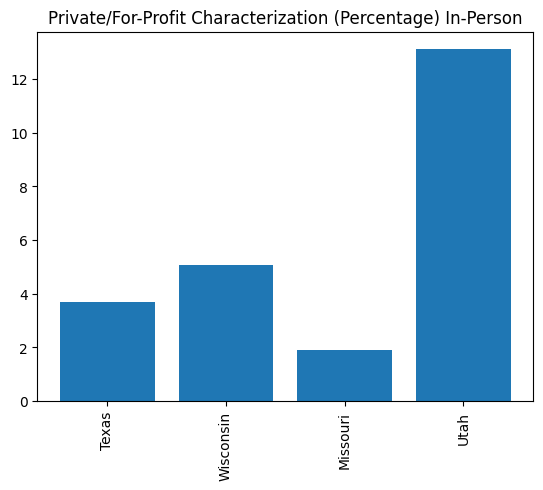

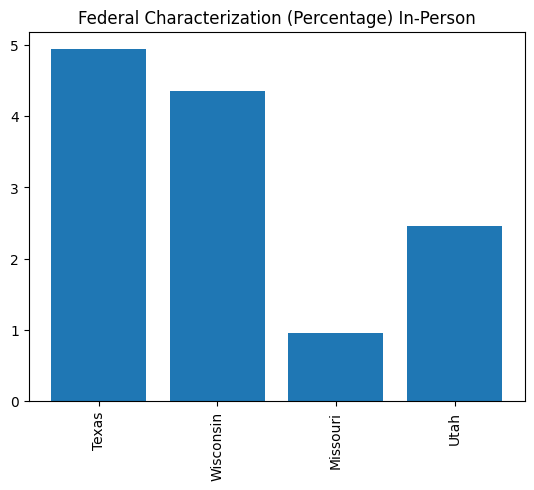

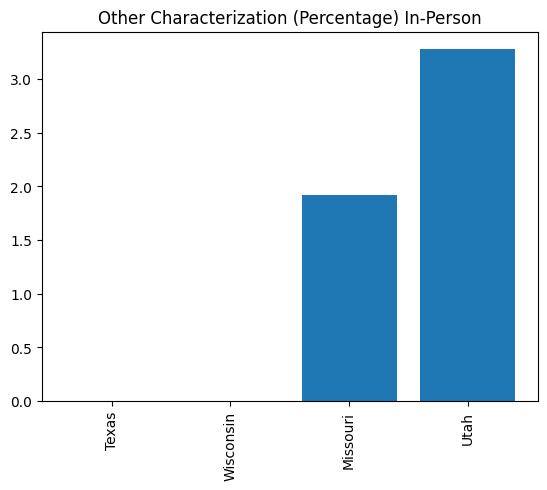

In [ ]:
#now for in-person

org_types = ['Academia','State/Local Government',
                   'NGO','Non-US Government','NASA',
                   'Private/For-Profit','Federal','Other']
meeting_namesip = ['Texas','Wisconsin','Missouri','Utah']
o_typesip = {}
o_types_percentip = {}
for m in meeting_namesip:
  o_typesip[m] = {}
  o_types_percentip[m] = {}
  for c in org_types:
    o_typesip[m][c] = 0
    o_types_percentip[m][c] = 0.0

for index, row in clean_df_ip.iterrows():
  char_column = row['OrgType']
  meeting_column = row['Meeting']
  #print(char_column)
  #print(meeting_column)
  if isinstance(char_column,str):
    items = char_column.split(',')
    for i in items:
      o_typesip[meeting_column][i] += 1

meeting_att_lengthip = {'Texas': len(tx_df_ip),'Wisconsin': len(wi_df_ip),
                      'Missouri': len(mo_df_ip),'Utah': len(ut_df_ip)}
#
for i in o_typesip:
  for j in o_typesip[i]:
    o_types_percentip[i][j] = float (float(o_typesip[i][j]) / float(meeting_att_lengthip[i])*100)

inv_o_types_percentip = {}
for c in org_types:
  inv_o_types_percentip[c] = {}
  for m in meeting_namesip:
    inv_o_types_percentip[c][m] = o_types_percentip[m][c]

for i in o_types_percentip:
  names = list(o_types_percentip[i].keys())
  values = list(o_types_percentip[i].values())
  plt.bar(range(len(o_types_percentip[i])), values, tick_label=names)
  plt.title(i + " Organization Types (Percentage) In-Person")
  plt.xticks(rotation='vertical')
  plt.show()


for i in inv_o_types_percentip:
  names = list(inv_o_types_percentip[i].keys())
  values = list(inv_o_types_percentip[i].values())
  plt.bar(range(len(inv_o_types_percentip[i])), values, tick_label=names)
  plt.title(i + " Characterization (Percentage) In-Person")
  plt.xticks(rotation='vertical')
  plt.show()

89
WI TX: 87
WI MO TX: 39
WI MO TX: 39
MO TX: 20


<ipython-input-17-e9a9c1dd4c77>:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  mo_tx = mo_tx.merge(wi_mo_tx, on='Email', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', 1)
<ipython-input-17-e9a9c1dd4c77>:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  wi_tx = wi_tx.merge(wi_mo_tx, on='Email', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', 1)
<ipython-input-17-e9a9c1dd4c77>:31: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  mo_wi = mo_wi.merge(wi_mo_tx, on='Email', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', 1)
<ipython-input-17-e9a9c1dd4c77>:35: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argum

test
212
143
154
523
174
TimeDiff_fromEnd
-116 days +08:50:00          reshma.nargund@duke.edu
-106 days +10:03:00               kelvin.fong@dal.ca
-106 days +21:51:00             gmacdonald@urban.org
-100 days +23:10:00               zoe.davis@ec.gc.ca
-100 days +23:19:00           afarrow@greenpeace.org
                                   ...              
0 days 03:37:00              aksalman@central.uh.edu
0 days 04:40:00        ivan.gutierrez-avila@mssm.edu
0 days 22:42:00                 hartman.alec@epa.gov
1 days 00:57:00                 youbinan10@gmail.com
2 days 03:45:00                  castilljua@paho.org
Name: Email, Length: 174, dtype: object


<ipython-input-17-e9a9c1dd4c77>:50: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tx_uni2 = tx_uni1.merge(wi_df,on='Email',how='left',indicator=True).query('_merge == "left_only"').drop('_merge', 1)


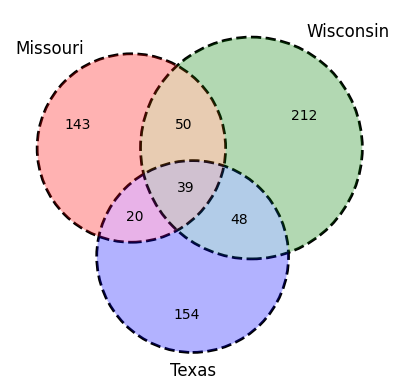

In [ ]:
#Common emails from each meeting
#maybe make a Sankey chart?
#mo_wi = pd.merge(mo_df,wi_df,how='inner',on=['Email','Email'])
mo_wi = pd.merge(mo_df,wi_df,left_on='Email',right_on='Email')
print(len(mo_wi))
#with excel, should be 89? Issue with duplicates?
#print(mo_wi)
#mo_wi.to_csv(r'MO_WI.csv')

#common_items = pd.merge(df1, df2, left_on='Column2', right_on='Column3')

mo_tx = pd.merge(mo_df,tx_df,how='inner',on=['Email','Email'])




wi_tx = pd.merge(wi_df,tx_df,how='inner',on=['Email','Email'])
print("WI TX: " +str(len(wi_tx)))

wi_mo_tx = pd.merge(wi_tx,mo_tx,how='inner',on=['Email','Email'])
print("WI MO TX: " + str(len(wi_mo_tx)))

wi_mo_tx = pd.merge(wi_tx,mo_tx,how='inner',on=['Email','Email'])
print("WI MO TX: " + str(len(wi_mo_tx)))

mo_tx = mo_tx.merge(wi_mo_tx, on='Email', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', 1)
print("MO TX: " + str(len(mo_tx)))
mo_tx.to_csv(r'MO_TX.csv')

wi_tx = wi_tx.merge(wi_mo_tx, on='Email', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', 1)
mo_wi = mo_wi.merge(wi_mo_tx, on='Email', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', 1)



wi_uni1 = wi_df.merge(wi_mo_tx, on='Email', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', 1)
mo_tx_out = pd.merge(mo_df,tx_df,how='outer',on=['Email','Email'])
mo_tx_out = pd.merge(mo_df,tx_df,how='outer',on=['Email','Email'])
wi_uni2 = wi_uni1.merge(mo_tx_out,on='Email',how='left',indicator=True).query('_merge == "left_only"').drop('_merge', 1)

wi_uni1 = wi_df.merge(mo_df, on='Email', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', 1)
wi_uni2 = wi_uni1.merge(tx_df,on='Email',how='left',indicator=True).query('_merge == "left_only"').drop('_merge', 1)
print('test')
print(len(wi_uni2))
wi_uni2.to_csv(r'wiuni.csv')

mo_uni1 = mo_df.merge(wi_df, on='Email', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', 1)
mo_uni2 = mo_uni1.merge(tx_df,on='Email',how='left',indicator=True).query('_merge == "left_only"').drop('_merge', 1)
print (len(mo_uni2))
tx_uni1 = tx_df.merge(mo_df, on='Email', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', 1)
tx_uni2 = tx_uni1.merge(wi_df,on='Email',how='left',indicator=True).query('_merge == "left_only"').drop('_merge', 1)
print (len(tx_uni2))

#not doing what I think it does
wi_tx_out = pd.merge(wi_df.Email,tx_df.Email,how='outer',on=['Email','Email'])
print(len(wi_tx_out))

#up_duplicates = up_df[up_df.duplicated(subset='Email')]
ans = pd.concat([wi_df.Email, tx_df.Email, wi_df.Email]).drop_duplicates(keep=False)
print(len(ans))
print(ans)
#print (len(set(wi_df).difference(set(tx_df))))

#set1 = {mo_df['Email'].values,wi_df['Email'].values}

from matplotlib_venn import venn3_circles, venn3
venn3_circles(subsets=(len(mo_uni2),len(wi_uni2),len(mo_wi),len(tx_uni2),len(mo_tx),len(wi_tx),len(wi_mo_tx)),linestyle='dashed')
venn3(subsets=(len(mo_uni2),len(wi_uni2),len(mo_wi),len(tx_uni2),len(mo_tx),len(wi_tx),len(wi_mo_tx)),alpha=0.3,set_labels=('Missouri', 'Wisconsin', 'Texas'))

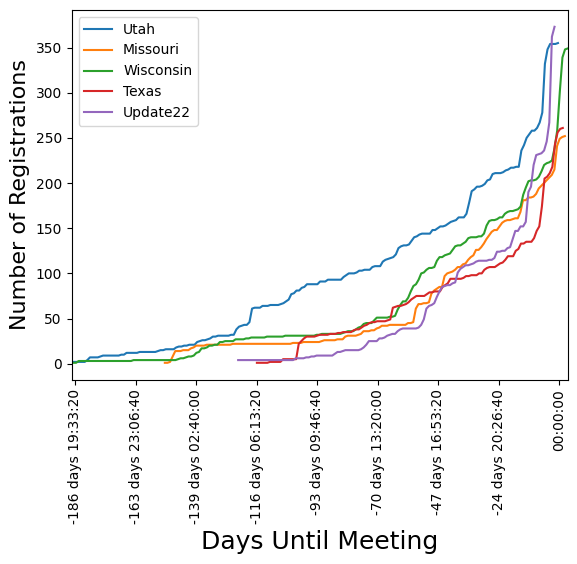

In [ ]:
#Per each meeting, graph recorded date on x axis as time, and y axis as total or count of that day
#df.plot(x='Recorded Date') #may need to add some kind of count value to plot cummulative number
#df['Recorded Date'] = pd.to_datetime(df['Recorded Date'],format="%m/%d/%y  %H:%M")

#only works when df.set_index('Recorded Date',inplace=True) is done upfront
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#plt.plot(df['Recorded Date'],df.count())

dailyUT = ut_df['Count'].resample('d').count().cumsum()
dailyUT.plot(label = "Utah")

dailyMO = mo_df['Count'].resample('d').count().cumsum()
dailyMO.plot(label = "Missouri")

#print(dailyMO)

dailyWI = wi_df['Count'].resample('d').count().cumsum()
dailyWI.plot(label = "Wisconsin")

dailyTX = tx_df['Count'].resample('d').count().cumsum()
dailyTX.plot(label = "Texas")

dailyUP = up_df['Count'].resample('d').count().cumsum()
dailyUP.plot(label = "Update22")

plt.xlabel('Days Until Meeting', fontsize=18)
plt.ylabel('Number of Registrations', fontsize=16)
plt.xticks(rotation=90)
leg = plt.legend(loc='upper left')
#format_str = '%d %m'
#format_ = mdates.DateFormatter(format_str)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('format_str'))
#
#myFmt = mdates.DateFormatter('%d')
#plt.gca().xaxis.set_major_formatter(myFmt)
#ax.xaxis.set_major_formatter(myFmt)

##in-person




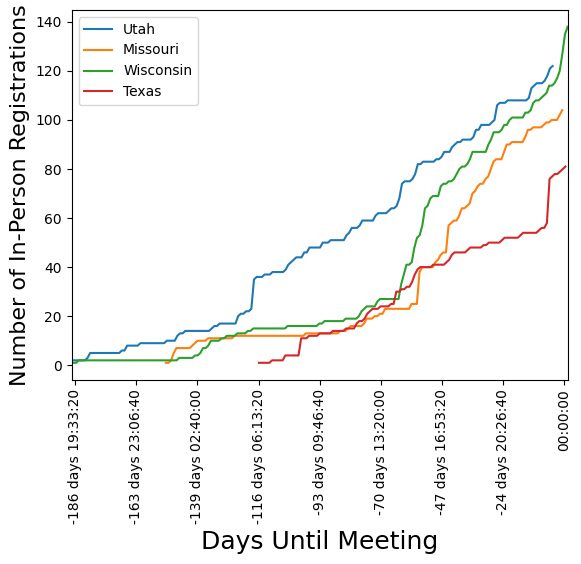

In [ ]:
#in-person version of number of registrations x days until meeting

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#plt.plot(df['Recorded Date'],df.count())

dailyUTip = ut_df_ip['Count'].resample('d').count().cumsum()
dailyUTip.plot(label = "Utah")

dailyMOip = mo_df_ip['Count'].resample('d').count().cumsum()
dailyMOip.plot(label = "Missouri")

dailyWIip = wi_df_ip['Count'].resample('d').count().cumsum()
dailyWIip.plot(label = "Wisconsin")

dailyTXip = tx_df_ip['Count'].resample('d').count().cumsum()
dailyTXip.plot(label = "Texas")

#dailyUPip = up_df_ip['Count'].resample('d').count().cumsum()
#dailyUPip.plot(label = "Update22")

plt.xlabel('Days Until Meeting', fontsize=18)
plt.ylabel('Number of In-Person Registrations', fontsize=16)
plt.xticks(rotation=90)
leg = plt.legend(loc='upper left')

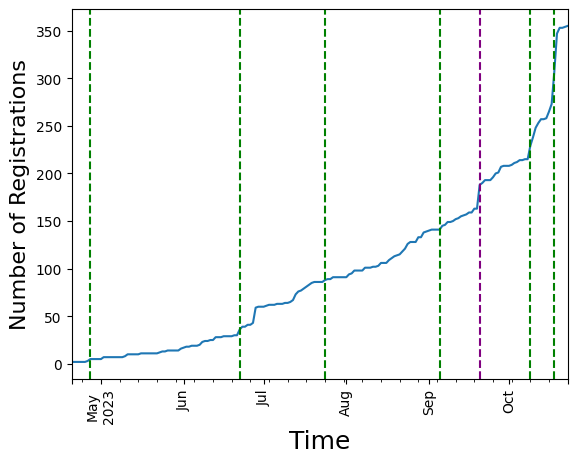

In [ ]:
import datetime
fig = plt.figure()
ut_df_date = ut_df
#ut_df_date.set_index('Recorded Date',inplace=True)
dailyUTv2 = ut_df_date['Count'].resample('d').count().cumsum()
dailyUTv2.plot(label = "Utah")
plt.xticks(rotation=90)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Number of Registrations', fontsize=16)
plt.axvline(datetime.datetime(2023, 9, 20,7), color='purple', linestyle='--')
plt.axvline(datetime.datetime(2023, 10, 18),color='green',linestyle='--')
plt.axvline(datetime.datetime(2023, 10, 9),color='green',linestyle='--')
plt.axvline(datetime.datetime(2023, 9, 5),color='green',linestyle='--')
plt.axvline(datetime.datetime(2023, 7, 24),color='green',linestyle='--')
plt.axvline(datetime.datetime(2023, 6, 22),color='green',linestyle='--')
plt.axvline(datetime.datetime(2023, 4, 27),color='green',linestyle='--')

In [ ]:
registration_dict = {}
name_dict = {}
email_dict = {}

df[df.duplicated(subset='Email')]

Total stakeholder percentage for Utah: 47.98927613941019


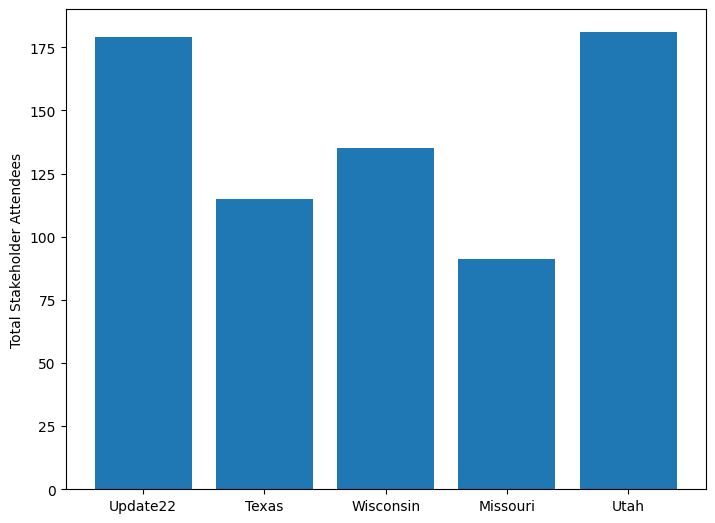

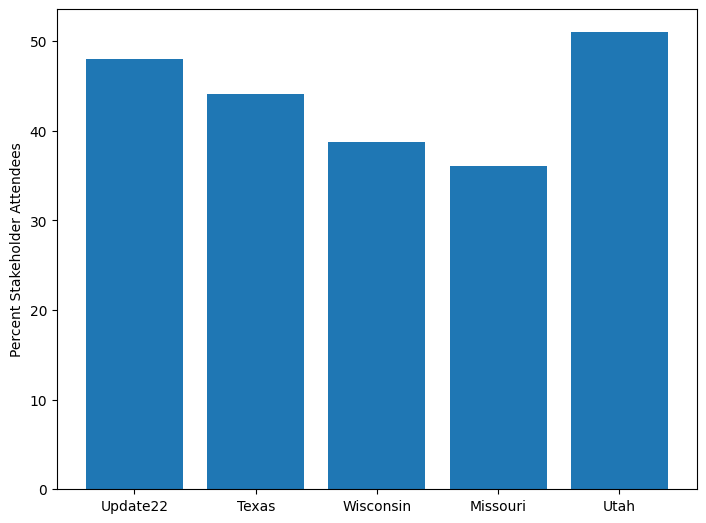

In [ ]:
import matplotlib.pyplot as plt

ut_stake = ut_df['Stakeholder'].sum()
ut_percentStake = float (ut_stake / len(ut_df)) * 100

mo_stake = mo_df['Stakeholder'].sum()
mo_percentStake = float (mo_stake / len(mo_df)) * 100

wi_stake = wi_df['Stakeholder'].sum()
wi_percentStake = float (wi_stake / len(wi_df)) * 100

tx_stake = tx_df['Stakeholder'].sum()
tx_percentStake = float (tx_stake / len(tx_df)) * 100

up_stake = up_df['Stakeholder'].sum()
up_percentStake = float (up_stake / len(up_df)) * 100
print("Total stakeholder percentage for Utah: " + str(up_percentStake))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
meeting_names = ['Update22','Texas','Wisconsin','Missouri','Utah']
#stakeholder_counts = [up_percentStake,tx_percentStake,wi_percentStake,mo_percentStake]
stakeholder_counts = [up_stake,tx_stake,wi_stake,mo_stake,ut_stake]
ax.bar(meeting_names,stakeholder_counts)
ax.set_ylabel('Total Stakeholder Attendees')
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
meeting_names = ['Update22','Texas','Wisconsin','Missouri','Utah']
#stakeholder_counts = [up_percentStake,tx_percentStake,wi_percentStake,mo_percentStake]
stakeholder_counts = [up_percentStake,tx_percentStake,wi_percentStake,mo_percentStake,ut_percentStake]
ax.bar(meeting_names,stakeholder_counts)
ax.set_ylabel('Percent Stakeholder Attendees')
plt.show()




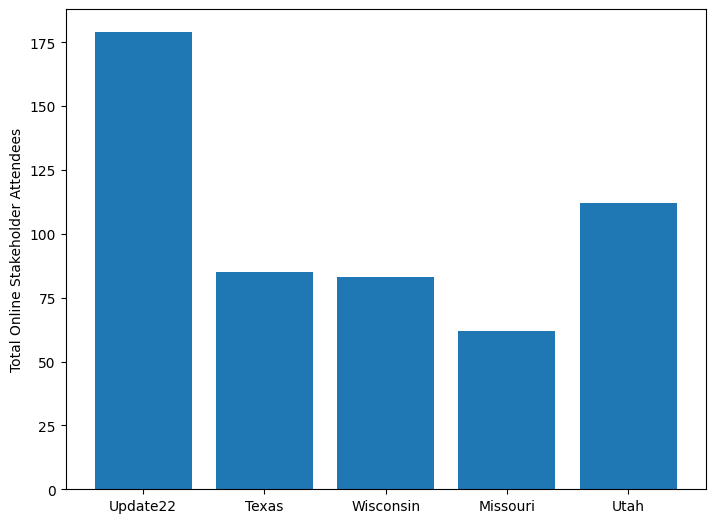

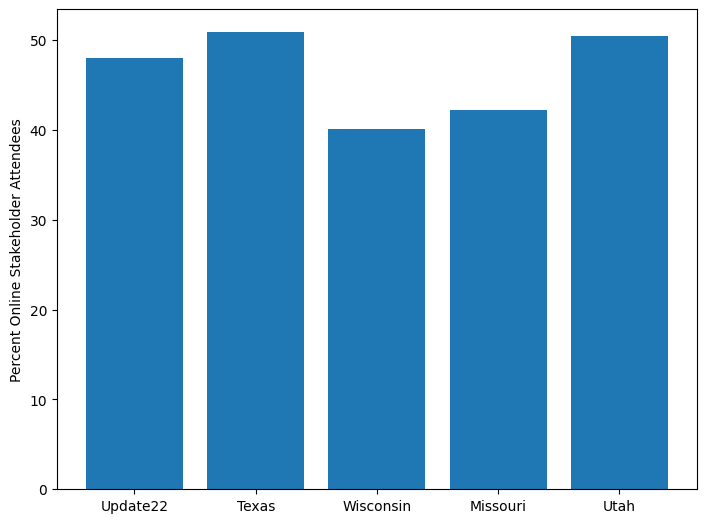

<ipython-input-24-31fd3336a4db>:53: RuntimeWarning: invalid value encountered in long_scalars
  up_percentStake_ip = float (up_stake_ip / len(up_df_ip)) * 100


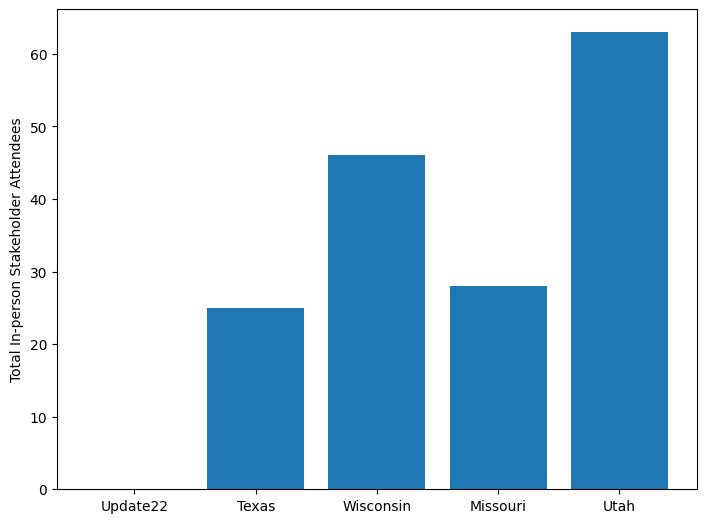

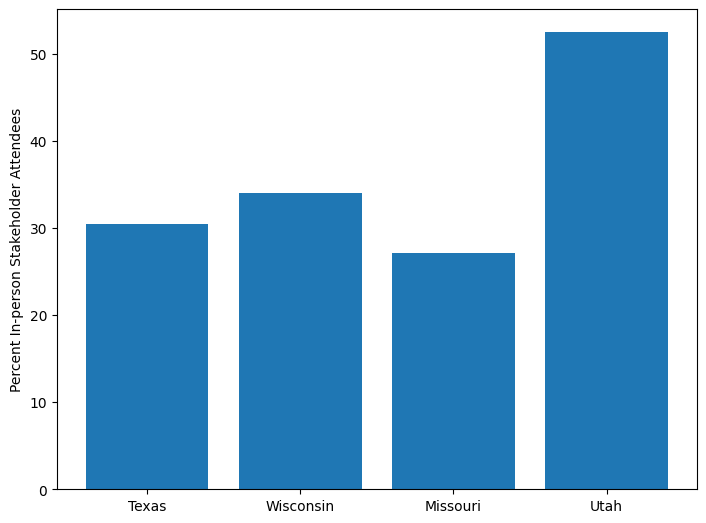

In [ ]:
import matplotlib.pyplot as plt

#percentage of attendees who are stakeholders from the ONLINE audience
ut_stake_on = ut_df_on['Stakeholder'].sum()
ut_percentStake_on = float (ut_stake_on / len(ut_df_on)) * 100

mo_stake_on = mo_df_on['Stakeholder'].sum()
mo_percentStake_on = float (mo_stake_on / len(mo_df_on)) * 100

wi_stake_on = wi_df_on['Stakeholder'].sum()
wi_percentStake_on = float (wi_stake_on / len(wi_df_on)) * 100

tx_stake_on = tx_df_on['Stakeholder'].sum()
tx_percentStake_on = float (tx_stake_on / len(tx_df_on)) * 100

up_stake_on = up_df_on['Stakeholder'].sum()
up_percentStake_on = float (up_stake_on / len(up_df_on)) * 100

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
meeting_names = ['Update22','Texas','Wisconsin','Missouri','Utah']
stakeholder_counts = [up_stake_on,tx_stake_on,wi_stake_on,mo_stake_on,ut_stake_on]
#stakeholder_counts = [up_stake_on,tx_stake_on,wi_stake_on,mo_stake_on]
ax.bar(meeting_names,stakeholder_counts)
ax.set_ylabel('Total Online Stakeholder Attendees')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
meeting_names = ['Update22','Texas','Wisconsin','Missouri','Utah']
stakeholder_counts = [up_percentStake_on,tx_percentStake_on,wi_percentStake_on,mo_percentStake_on,ut_percentStake_on]
#stakeholder_counts = [up_stake_on,tx_stake_on,wi_stake_on,mo_stake_on]
ax.bar(meeting_names,stakeholder_counts)
ax.set_ylabel('Percent Online Stakeholder Attendees')
plt.show()


## percent stakeholders who are in-person

ut_stake_ip = ut_df_ip['Stakeholder'].sum()
ut_percentStake_ip = float (ut_stake_ip / len(ut_df_ip)) * 100

mo_stake_ip = mo_df_ip['Stakeholder'].sum()
mo_percentStake_ip = float (mo_stake_ip / len(mo_df_ip)) * 100

wi_stake_ip = wi_df_ip['Stakeholder'].sum()
wi_percentStake_ip = float (wi_stake_ip / len(wi_df_ip)) * 100

tx_stake_ip = tx_df_ip['Stakeholder'].sum()
tx_percentStake_ip = float (tx_stake_ip / len(tx_df_ip)) * 100

up_stake_ip = up_df_ip['Stakeholder'].sum()
up_percentStake_ip = float (up_stake_ip / len(up_df_ip)) * 100

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
meeting_names = ['Update22','Texas','Wisconsin','Missouri','Utah']
stakeholder_counts = [up_stake_ip,tx_stake_ip,wi_stake_ip,mo_stake_ip,ut_stake_ip]
#stakeholder_counts = [up_stake_on,tx_stake_on,wi_stake_on,mo_stake_on]
ax.bar(meeting_names,stakeholder_counts)
ax.set_ylabel('Total In-person Stakeholder Attendees')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
meeting_names = ['Update22','Texas','Wisconsin','Missouri','Utah']
stakeholder_counts = [up_percentStake_ip,tx_percentStake_ip,wi_percentStake_ip,mo_percentStake_ip,ut_percentStake_ip]
#stakeholder_counts = [up_stake_on,tx_stake_on,wi_stake_on,mo_stake_on]
ax.bar(meeting_names,stakeholder_counts)
ax.set_ylabel('Percent In-person Stakeholder Attendees')
plt.show()

#print(ut_percentStake_on)
#print(mo_percentStake_on)
#print(wi_percentStake_on)
#print(tx_percentStake_on)

In [ ]:
#Epoch time - maybe don't need any of this if using Difference in time
#need to convert dates to time since first recorded date, then find a way to combine
#all on one graph
#epoch time
mo_epoch_time = datetime(2022,11,18)

print(df['Duration (in seconds)'])


#mo_df.insert(0,'delta',mo_df['Recorded Date'] - mo_epoch_time)
#mo_df['delta'] = mo_df['Recorded Date'].apply(lambda x: x - mo_epoch_time)


#mo_df.set_index('Recorded Date',inplace=True)
#daily = mo_df.resample('d').count().cumsum()
#daily.plot()

Recorded Date
2022-11-18 12:46:00     62
2022-11-21 07:30:00     64
2022-11-21 12:46:00     83
2022-11-21 15:47:00    377
2022-11-22 08:53:00    184
                      ... 
2022-01-21 08:13:00     60
2022-01-21 08:23:00     62
2022-01-21 08:39:00     33
2022-01-21 09:42:00     43
2022-01-21 10:40:00     90
Name: Duration (in seconds), Length: 1352, dtype: int64
